# Linear Regression Implementation using Stocks
I will be using a stock, specifically NVIDIA or NVDA, to show linear regression. I will use the yfinance tool to extract data for NVIDIA's performance and use that to train the algorithm to determine the next closing prices.

This is important because NVIDIA is a hot stock right now that everyone wants to buy. It's a known fact that no one can predict what the market will do, so we will try and figure out what the stock price will do using linear regression.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
import yfinance as yf
from matplotlib.pyplot import figure


I first extract stock prices for all of 2024 for training purposes.

In [56]:
data = yf.download('NVDA', start = '2024-01-01', end = '2024-12-31')
data.head()

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/3969938101.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-01-02,48.146576,49.273074,47.573833,49.222098,411254000
2024-01-03,47.547836,48.162561,47.298947,47.463874,320896000
2024-01-04,47.976654,48.478430,47.486870,47.745754,306535000
2024-01-05,49.075161,49.524962,48.284512,48.440445,415039000
2024-01-08,52.229755,52.251749,49.456991,49.489977,642510000


Now I clean the data and to display closing prices.

In [57]:
all_df = pd.DataFrame(data["Close"])
all_df.columns = ['Close']  

for i in range(1, 8):
    all_df[f'lag_{i}'] = all_df['Close'].shift(i)

all_df.head(10)


,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2024-01-02,48.146576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,47.547836,48.146576,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-04,47.976654,47.547836,48.146576,NaN,NaN,NaN,NaN,NaN
2024-01-05,49.075161,47.976654,47.547836,48.146576,NaN,NaN,NaN,NaN
2024-01-08,52.229755,49.075161,47.976654,47.547836,48.146576,NaN,NaN,NaN
2024-01-09,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576,NaN,NaN
2024-01-10,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576,NaN
2024-01-11,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576
2024-01-12,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836


We will use 10 days in January to train the model

In [58]:
all_df.dropna(inplace=True)
cols = [f'lag_{i}' for i in range(1, 8)]
train_df = all_df.iloc[0:180, :]
train_df.head(10)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2024-01-11,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576
2024-01-12,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836
2024-01-16,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654
2024-01-17,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161
2024-01-18,57.081604,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755
2024-01-19,59.464539,57.081604,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364
2024-01-22,59.627468,59.464539,57.081604,56.028069,56.356922,54.685658,54.797615,54.325821
2024-01-23,59.846375,59.627468,59.464539,57.081604,56.028069,56.356922,54.685658,54.797615
2024-01-24,61.334705,59.846375,59.627468,59.464539,57.081604,56.028069,56.356922,54.685658


In [59]:
X = train_df[cols].to_numpy()
y = train_df['Close'].to_numpy()
w_hat = np.linalg.inv(X.T@X)@X.T@y
w_hat

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/3563350768.py:3: RuntimeWarning:

divide by zero encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/3563350768.py:3: RuntimeWarning:

overflow encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/3563350768.py:3: RuntimeWarning:

invalid value encountered in matmul



array([ 0.89352818,  0.18516445, -0.08282097,  0.06451508, -0.13850662,
        0.08511332, -0.00421237])

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/840875718.py:1: RuntimeWarning:

divide by zero encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/840875718.py:1: RuntimeWarning:

overflow encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/840875718.py:1: RuntimeWarning:

invalid value encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/840875718.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/840875718.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

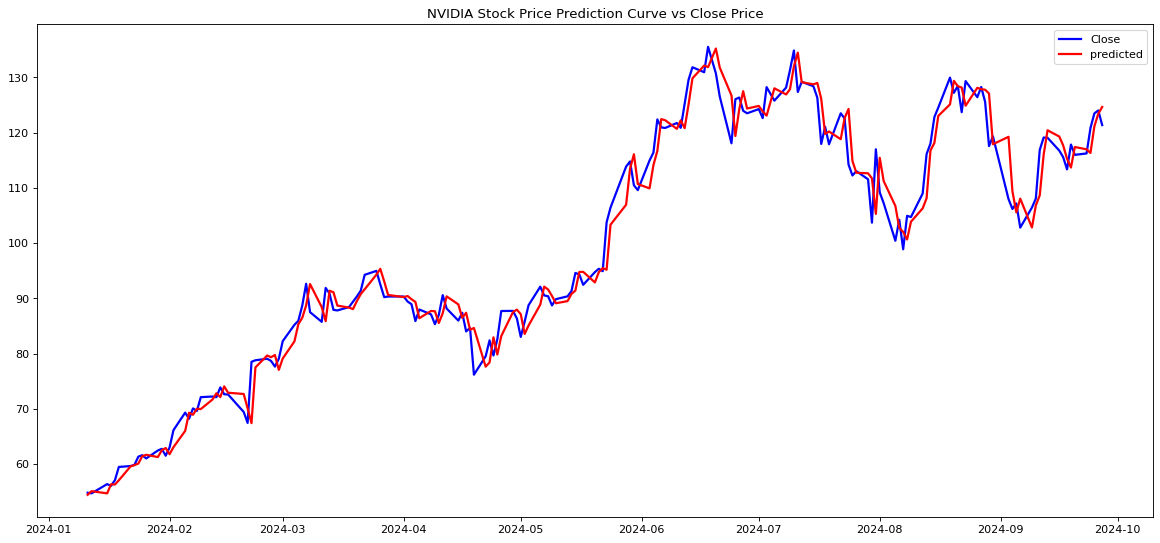

In [60]:
train_df['predicted'] = X@w_hat

figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predicted']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predicted', data=plot_data, marker='', color='red', linewidth=2)
plt.legend()
plt.title('NVIDIA Stock Price Prediction Curve vs Close Price')
plt.show()

Prediction curve is pretty good as the closing and predicted closing prices are pretty similar! Keep in mind this is better for long term investments as the prices are off by a little bit if you look at each day, but mirrors the overall movement very well long term. In other words, this not good for determining the exact price for tomorrow's close, but is good for determining if NVIDIA will be up or down and by roughly how much 6 months from now.

Now will move on to the prediction curve with bias.

In [61]:
train_df['ones'] = np.ones(len(train_df['Close']))
train_df.head(5)

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/3855497709.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,predicted,ones
Date,,,,,,,,,,
2024-01-11,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576,54.416342,1.0
2024-01-12,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,55.078811,1.0
2024-01-16,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,54.677924,1.0
2024-01-17,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,56.330539,1.0
2024-01-18,57.081604,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,56.280524,1.0


In [62]:
cols = [f'lag_{i}' for i in range (1,8)]
cols.append('ones')
train_df[cols].head(5)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,ones
Date,,,,,,,,
2024-01-11,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,48.146576,1.0
2024-01-12,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,47.547836,1.0
2024-01-16,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,47.976654,1.0
2024-01-17,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,49.075161,1.0
2024-01-18,56.028069,56.356922,54.685658,54.797615,54.325821,53.116364,52.229755,1.0


Now add bias

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:2: RuntimeWarning:

divide by zero encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:2: RuntimeWarning:

overflow encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:2: RuntimeWarning:

invalid value encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:3: RuntimeWarning:

divide by zero encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:3: RuntimeWarning:

overflow encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:3: RuntimeWarning:

invalid value encountered in matmul

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/922585192.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

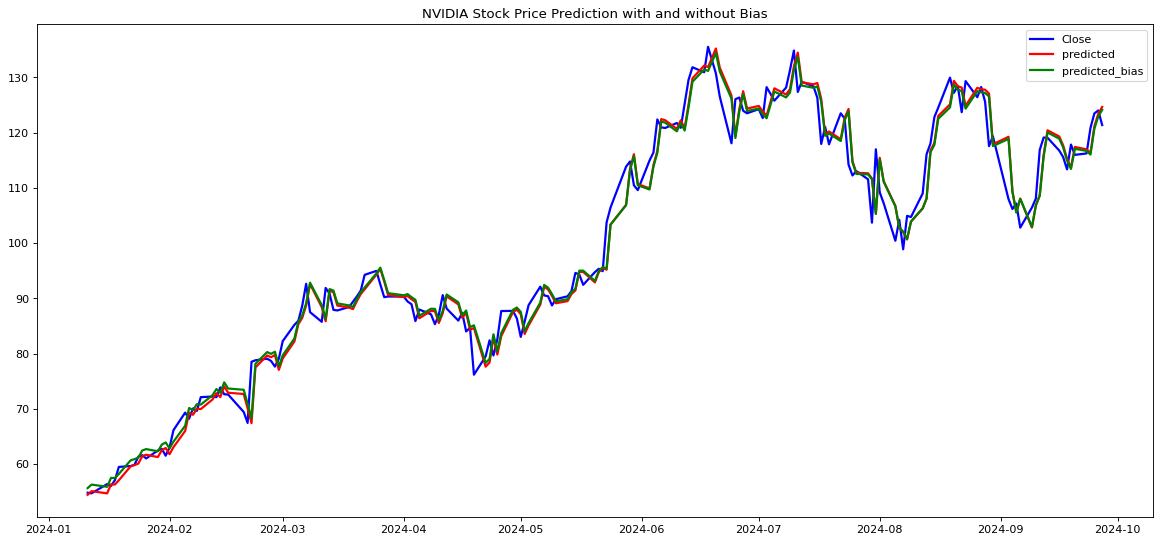

In [63]:
X_bias = train_df[cols].to_numpy()
w_hat_bias = np.linalg.inv(X_bias.T@X_bias)@X_bias.T@y
train_df['predicted_bias'] = X_bias@w_hat_bias


figure(figsize=(18, 8), dpi=80)
plot_data = train_df[['Close', 'predicted', 'predicted_bias']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.plot( 'Date','predicted', data=plot_data, marker='', color='red', linewidth=2)
plt.plot( 'Date','predicted_bias', data=plot_data, marker='', color='green', linewidth=2)
plt.title('NVIDIA Stock Price Prediction with and without Bias')
plt.legend()
plt.show()

With the bias, the linear regression is allowed to be shifted up or down as needed and does not need to be constrained to pass through the origin. Here it is a very minor difference but leads to a marginally better result.

Time for finding the Root Mean Squared Error (RMSE)

In [64]:
y_hat_1 = train_df["predicted"].to_numpy()
y_hat_2 = train_df["predicted_bias"].to_numpy()

def RMSE(labels, predicted):
    return np.sqrt(np.mean((labels - predicted) @ (labels - predicted)))

print(f'In-Sample RMSE_without_bias ={RMSE(y, y_hat_1)}')
print(f'In-Sample RMSE_with_bias ={RMSE(y, y_hat_2)}')


In-Sample RMSE_without_bias =48.37879002877129
In-Sample RMSE_with_bias =47.801518604128894


We get a slightly better MSRE with bias which makes sense as the average data point is just a bit closer to the linear regression line when comparing with bias to without bias.

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/99893962.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



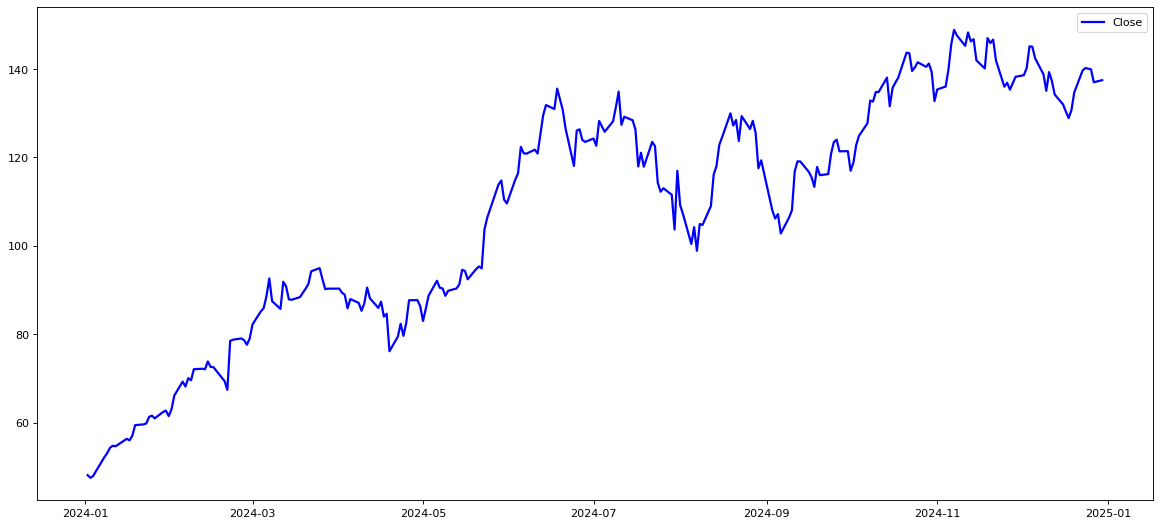

In [65]:
data["log_Close"] = np.log(data["Close"])

figure(figsize=(18, 8), dpi=80)
plot_data = data[['Close']]
plot_data['Date'] = plot_data.index
plt.plot( 'Date', 'Close', data= plot_data, marker='', markerfacecolor='blue', color='blue', linewidth=2)
plt.legend()
plt.show()

Now I want to test my linear regression data. I will use the first half of 2025 and test it on that.

In [66]:
test_data = yf.download('NVDA', start = '2025-01-01', end = '2025-06-15')
data.head()

/var/folders/7t/w17knfdn36n_njq1kn6ytj_h0000gn/T/ipykernel_7641/2056310760.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,log_Close
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2024-01-02,48.146576,49.273074,47.573833,49.222098,411254000,3.874250
2024-01-03,47.547836,48.162561,47.298947,47.463874,320896000,3.861736
2024-01-04,47.976654,48.478430,47.486870,47.745754,306535000,3.870715
2024-01-05,49.075161,49.524962,48.284512,48.440445,415039000,3.893353
2024-01-08,52.229755,52.251749,49.456991,49.489977,642510000,3.955652


I will use the closing prices of earlier days to determine the closing price of later dates. The good thing is that the algorithm knows from training what weights to use. This will help it create a pretty good graph...better than the training.

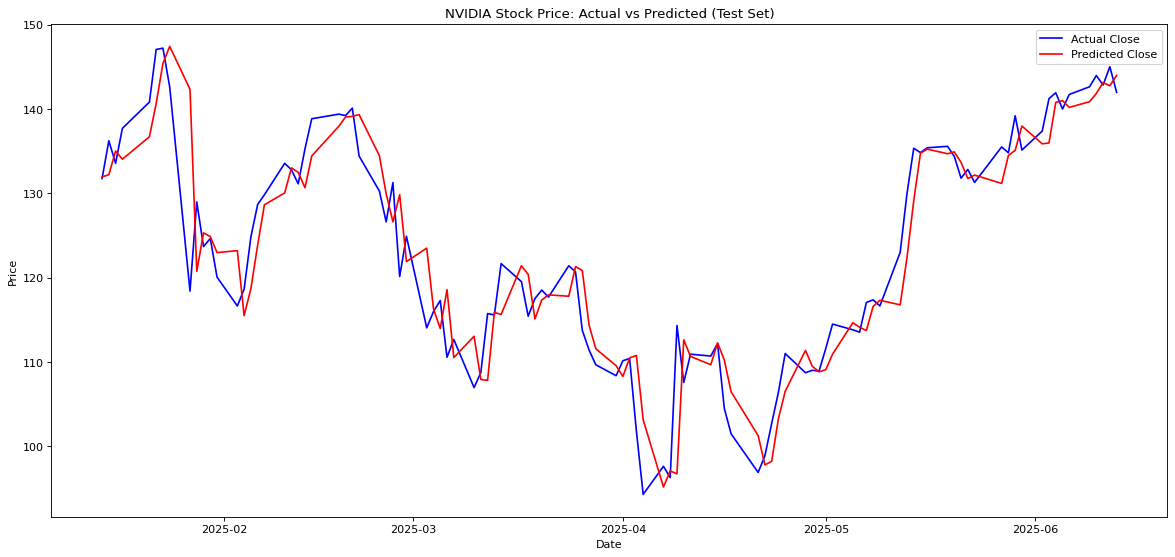

In [69]:
for i in range(1, 8):
	test_data[f'lag_{i}'] = test_data[('Close', 'NVDA')].shift(i)

test_data['ones'] = 1.0

test_data_lagged = test_data.dropna().copy()

test_X = test_data_lagged[cols].to_numpy()

# Predict using the weights from training
pred_test_y = test_X @ w_hat_bias

test_data_lagged["predictions"] = pred_test_y

df_plot = test_data_lagged.reset_index()
df_plot.columns = ['Date'] + [col[0] if isinstance(col, tuple) else col for col in df_plot.columns[1:]]

plt.figure(figsize=(18, 8), dpi=80)
plt.plot(df_plot['Date'], df_plot['Close'], label='Actual Close', color='blue')
plt.plot(df_plot['Date'], df_plot['predictions'], label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVIDIA Stock Price: Actual vs Predicted (Test Set)')
plt.legend()
plt.show()

In [68]:
y_hat_3 = test_data_lagged["predictions"].to_numpy()
y_test = test_data_lagged[("Close", "NVDA")].to_numpy()  # actual test labels

def RMSE(labels, predicted):
    return np.sqrt(np.mean((labels - predicted) ** 2))

print(f'Test RMSE = {RMSE(y_test, y_hat_3)}')


Test RMSE = 4.826614050586123


We get a really small RMSE compared to the training data which means our algorithm learned and was able to get a pretty good linear regression line. Although this shouldn't be completely relied on for making financial decisions, it is a pretty good way of getting an idea of what the stock will do. This is useful for casual investors as well as the high-end investing firms for determining future stock performance.